# Evaluation of Multi-Tier Framework for measuring access to electricity 

### Importing the useful libraries

In [1908]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math
import plotly.express as px

### Converting the dataset from "dta" to "csv" 

In [1909]:
df = pd.io.stata.read_stata('Section C.dta')

In [1910]:
df.to_csv("Electricity_data.csv")

### Importing the dataset

In [1911]:
df = pd.read_csv('Electricity_data.csv')

In [1912]:
df.head()

,Unnamed: 0,HHID,C1,C2,C3,C4,C4_other,C5,C6_mm,C6_yy,...,C118,C119_1,C119_1_other,C119_2,C119_2_other,C120,C121,C122,C123,C124
0,0,1010200116005,1,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,solar lanterns,0.0,0.0,1.0
1,1,1010200116014,1,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN
2,2,1010200116023,1,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN
3,3,1010200116032,1,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN
4,4,1010200116041,1,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,solar lanterns,0.0,0.0,1.0


In [1913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Columns: 173 entries, Unnamed: 0 to C124
dtypes: float64(76), int64(3), object(94)
memory usage: 5.7+ MB


Electricity_data = pd.ExcelWriter('Electricity_data.xlsx') 
df.to_excel(Electricity_data, index = False)   
Electricity_data.save() 

### Analysing different Attributes

Attributes which are analysed for MTF_Ethiopia_Questionnaire_Household: 

1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability
6. Formality
7. Health and safety

# Attribute: Capacity

To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C21: Power available from the national grid
2. C58: Power available from the mini grid
3. Generator set (No information provided)
4. Inverter (No information provided)
5. Batteries (No information provided)
6. Solar panel (No information provided)
7. Solar batteries (No information provided)

In [1914]:
df_analysis= df[['C21', 'C58']]

In [1915]:
df_analysis.head(10)

,C21,C58
0,20.0,NaN
1,43.0,NaN
2,43.0,NaN
3,51.0,NaN
4,43.0,NaN
5,43.0,NaN
6,93.0,NaN
7,NaN,NaN
8,102.0,NaN
9,43.0,NaN


### Renaming the columns

For a better understanding of the dataset, the columns are named as follows:

1. C21: National_Grid
2. C58: Mini_Grid

In [1916]:
df_analysis.columns = ['National_Grid', 'Mini_Grid']

In [1917]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  2674 non-null   float64
 1   Mini_Grid      22 non-null     float64
dtypes: float64(2)
memory usage: 67.6 KB


In [1918]:
df_analysis.head()

,National_Grid,Mini_Grid
0,20.0,NaN
1,43.0,NaN
2,43.0,NaN
3,51.0,NaN
4,43.0,NaN


In [1919]:
df_analysis.describe()

,National_Grid,Mini_Grid
count,2674.000000,22.000000
mean,151.918474,85.409091
std,244.636732,72.235500
min,0.000000,0.000000
25%,39.000000,13.500000
50%,100.000000,91.000000
75%,213.750000,124.000000
max,4756.000000,222.000000


In [1920]:
df_analysis['National_Grid'].value_counts()

0.0      302
51.0     167
26.0      93
117.0     85
43.0      66
        ... 
159.0      1
367.0      1
402.0      1
470.0      1
445.0      1
Name: National_Grid, Length: 459, dtype: int64

## Analysing capacity: "Total_capacity"

Total capacity is the sum of capacities of all the power sources.

In [1921]:
lst=[]
for i in range(df_analysis.shape[0]):
    add=0
    gotnum= False
    for j in range(df_analysis.shape[1]):
        if math.isnan(df_analysis.iat[i,j])==False:
            gotnum=True
            add = add + df_analysis.iat[i,j]
    if gotnum :
        lst.append(add)
    else:
        lst.append(math.nan)
    
# adding list to dataframe
df_analysis["Total_Capacity"] = lst

### Visualizing the new dataset

In [1922]:
df_analysis.head(10)

,National_Grid,Mini_Grid,Total_Capacity
0,20.0,NaN,20.0
1,43.0,NaN,43.0
2,43.0,NaN,43.0
3,51.0,NaN,51.0
4,43.0,NaN,43.0
5,43.0,NaN,43.0
6,93.0,NaN,93.0
7,NaN,NaN,NaN
8,102.0,NaN,102.0
9,43.0,NaN,43.0


In [1923]:
df_analysis.describe()

,National_Grid,Mini_Grid,Total_Capacity
count,2674.000000,22.000000,2696.000000
mean,151.918474,85.409091,151.375742
std,244.636732,72.235500,243.793063
min,0.000000,0.000000,0.000000
25%,39.000000,13.500000,39.000000
50%,100.000000,91.000000,100.000000
75%,213.750000,124.000000,212.000000
max,4756.000000,222.000000,4756.000000


### Using boxplot to see outliers in the dataset

In [1924]:
fig = px.box(df_analysis.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

Conclusion 1:

It can be seen in the above figure that the outliers lies in:

1. National grid
2. Total capacity

Conclusion 2:

Maybe these are not outliers but the households consuming a lot of electricity

In [1925]:
df_total=df_analysis[['Total_Capacity']]

The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [1926]:
df_total['Total_Capacity']= df_total.Total_Capacity.apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [1927]:
df_total.head()

,Total_Capacity
0,666.666667
1,1433.333333
2,1433.333333
3,1700.000000
4,1433.333333


In [1928]:
df_total['Total_Capacity'].value_counts()

0.000000        306
1700.000000     168
866.666667       93
3900.000000      86
1433.333333      66
               ... 
25666.666667      1
4933.333333       1
10300.000000      1
4800.000000       1
4066.666667       1
Name: Total_Capacity, Length: 459, dtype: int64

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1929]:
df_total["Total_Capacity"] = df_total.Total_Capacity.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [1930]:
df_total.head()

,Total_Capacity
0,666.667
1,1433.33
2,1433.33
3,1700
4,1433.33


In [1931]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Total_Capacity  4317 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


### Adding column "TIER" to the dataset 

In [1932]:
def conditions(Total_Capacity):
    if Total_Capacity =='Missing_data':
        return "Missing_data"
    elif Total_Capacity<12:
        return "0"
    elif 12<=Total_Capacity<200:
        return "1"
    elif 200<=Total_Capacity<1000:
        return "2"
    elif 1000<=Total_Capacity<3400:
        return "3"
    elif 3400<=Total_Capacity<8200:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_total.Total_Capacity)
df_total["TIER"] = transform

In [1933]:
df_total.head()

,Total_Capacity,TIER
0,666.667,2
1,1433.33,3
2,1433.33,3
3,1700,3
4,1433.33,3


### Printing the TIER counts

In [1934]:
df_total['TIER'].value_counts()

Missing_data    1621
4                842
3                743
5                495
0                306
2                257
1                 53
Name: TIER, dtype: int64

### Visualizing the TIER

Text(0.5, 1.0, 'TIER levels based on power capacity')

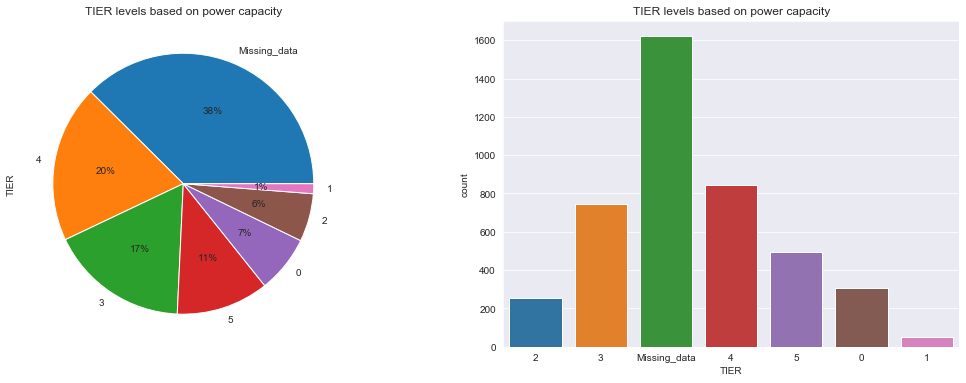

In [1935]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_total['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df_total,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')


### Analysing the dataset without missing data

In [1936]:
df2 = df_total[df_total != 'Missing_data'] 


Text(0.5, 1.0, 'TIER levels based on power capacity')

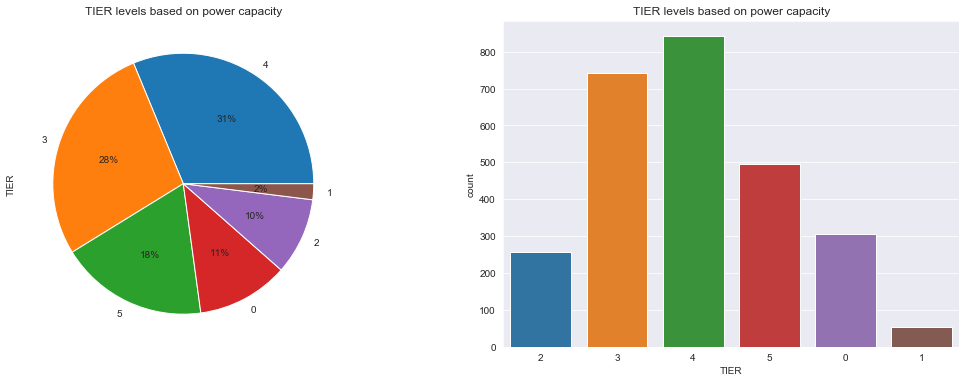

In [1937]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df2,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph it can be seen:

1. TIER 0 corresponds to 11% of the households which recieves less than 12Wh of power supply
2. TIER 1 corresponds to 2% of the households which recieves at least 12Wh of power supply
3. TIER 2 corresponds to 10% of the households which recieves at least 200Wh of power supply
4. TIER 3 corresponds to 28% of the households which recieves at least 1kWh of power supply
5. TIER 4 corresponds to 31% of the households which recieves at least 3.4kWh of power supply
6. TIER 5 corresponds to 18% of the households which recieves at least 8.2kWh of power supply


# Attribute: Availabilty

## Availability: Day and night

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C25_wm represents the hours of electricity available each day and night from the national grid in the worst months. 
* Whereas, C25_tm represents the hours of electricity available each day and night from  the national grid in the typical months.
* q62_wm represents the hours of electricity available each day and night from the mini grid in the worst months.
* Whereas, C62_tm represents the hours of electricity available each day and night from  the mini grid in the typical months.
* C97_wm represents the hours of electricity available each day and night from the generator set in the worst months.
* Whereas, C97_tm represents the hours of electricity available each day and night from  the generator set in the typical months.



In [1938]:
df_av= df[['C25_wm','C25_tm','q62_wm','C62_tm','C97_wm','C97_tm']]

### Renaming the columns

In [1939]:
df_av.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical']

In [1940]:
df_av.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,Generator_set_Worst,Generator_set_Typical
4312,NaN,NaN,NaN,NaN,NaN,NaN
4313,NaN,NaN,NaN,NaN,NaN,NaN
4314,NaN,NaN,NaN,NaN,NaN,NaN
4315,NaN,NaN,NaN,NaN,NaN,NaN
4316,NaN,NaN,NaN,NaN,NaN,NaN


In [1941]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    2637 non-null   object 
 1   National_grid_Typical  2637 non-null   object 
 2   Mini_grid_Worst        22 non-null     object 
 3   Mini_grid_Typical      22 non-null     float64
 4   Generator_set_Worst    19 non-null     float64
 5   Generator_set_Typical  19 non-null     float64
dtypes: float64(3), object(3)
memory usage: 202.5+ KB


### Calculation

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [1942]:
#National Grid
df_av['National_grid_Total'] = df_av.National_grid_Worst.fillna(value=df_av.National_grid_Typical)

#National Grid
df_av['Mini_grid_Total'] = df_av.Mini_grid_Worst.fillna(value=df_av.Mini_grid_Typical)

#Generator Set
df_av['Generator_set_Total'] = df_av.Generator_set_Worst.fillna(value=df_av.Generator_set_Typical)



#Taking only the total values into consideration
df_av_new=df_av[['National_grid_Total','Mini_grid_Total','Generator_set_Total']]

In [1943]:
df_av_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total
4312,NaN,NaN,NaN
4313,NaN,NaN,NaN
4314,NaN,NaN,NaN
4315,NaN,NaN,NaN
4316,NaN,NaN,NaN


In [1944]:
df_av_new['National_grid_Total'].value_counts()

12.0          334
0.0           304
16.0          224
20.0          219
10.0          215
18.0          178
8.0           143
6.0           127
22.0          104
15.0          102
14.0          102
4.0            78
21.0           61
don't know     54
2.0            54
19.0           52
5.0            49
17.0           44
3.0            42
24.0           30
23.0           26
11.0           25
9.0            22
7.0            22
13.0           19
1.0             7
Name: National_grid_Total, dtype: int64

### Changing the string variables into float/int 

In [1945]:
df_av_new=df_av_new.replace(to_replace="don't know",value=math.nan)

In [1946]:
df_av_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  2583 non-null   object 
 1   Mini_grid_Total      21 non-null     object 
 2   Generator_set_Total  19 non-null     float64
dtypes: float64(1), object(2)
memory usage: 101.3+ KB


In [1947]:
df_av_new= df_av_new.apply(pd.to_numeric, errors='coerce')

In [1948]:
df_av_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  2583 non-null   float64
 1   Mini_grid_Total      21 non-null     float64
 2   Generator_set_Total  19 non-null     float64
dtypes: float64(3)
memory usage: 101.3 KB


### Calculating the total availability

In [1949]:
lst=[]
for i in range(df_av_new.shape[0]):
    add=0
    gotnum= False
    for j in range(df_av_new.shape[1]):
        if math.isnan(df_av_new.iat[i,j])==False:
            gotnum=True
            add = add + df_av_new.iat[i,j]
    if gotnum :
        lst.append(add)
    else:
        lst.append(math.nan)
    
# adding list to dataframe
df_av_new["Total_availability"] = lst

In [1950]:
df_av_new.head()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Total_availability
0,12.0,NaN,NaN,12.0
1,12.0,NaN,NaN,12.0
2,12.0,NaN,NaN,12.0
3,12.0,NaN,NaN,12.0
4,10.0,NaN,NaN,10.0


In [1951]:
df_av_new=df_av_new[['Total_availability']]

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1952]:
df_av_new['Total_availability'] = df_av_new.replace(np.nan, 'Missing_data')

In [1953]:
df_av_new.tail()

,Total_availability
4312,Missing_data
4313,Missing_data
4314,Missing_data
4315,Missing_data
4316,Missing_data


### Adding column "TIER" to the dataset 

In [1954]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def conditions(Total_availability):
    if Total_availability == 'Missing_data':
        return "Missing_data"
    elif Total_availability<4:
        return "0"
    elif 4<=Total_availability<8:
        return "1&2"
    elif 8<=Total_availability<16:
        return "3"
    elif 16<=Total_availability<23:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_av_new.Total_availability)
df_av_new["TIER"] = transform

In [1955]:
df_av_new.tail()

,Total_availability,TIER
4312,Missing_data,Missing_data
4313,Missing_data,Missing_data
4314,Missing_data,Missing_data
4315,Missing_data,Missing_data
4316,Missing_data,Missing_data


In [1956]:
df_av_new['TIER'].value_counts()

Missing_data    1702
3                960
4                887
0                427
1&2              283
5                 58
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on day and night power availability')

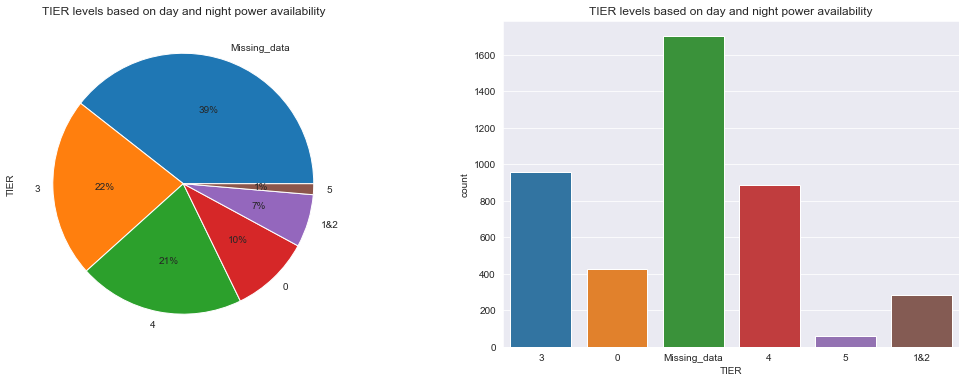

In [1957]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_av_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on day and night power availability')

#Barplot
sns.countplot('TIER',data=df_av_new,ax=ax[1])
ax[1].set_title('TIER levels based on day and night power availability')

### Visualizing the TIER without "missing data"

In [1958]:
df2 = df_av_new[df_av_new != 'Missing_data'] 


In [1959]:
df2.head()

,Total_availability,TIER
0,12,3
1,12,3
2,12,3
3,12,3
4,10,3


In [1960]:
df2['TIER'].value_counts()

3      960
4      887
0      427
1&2    283
5       58
Name: TIER, dtype: int64

Text(0.5, 1.0, 'TIER levels based on power capacity')

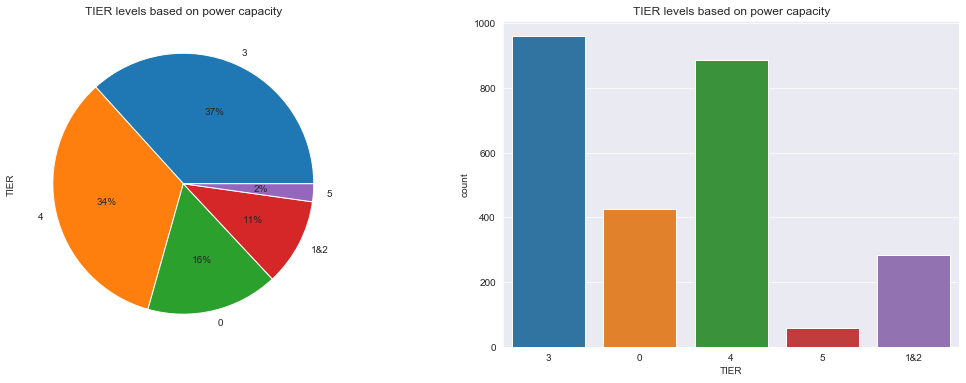

In [1961]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df2,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph we can see that the daily availability in:

1. TIER 0 contributes to 16% of evening availability which is less than 4 hours
2. TIER 1&2 contributes to 11% of evening availability which is at least 4 hours
3. TIER 3 contributes to 37% of evening availability which is at least 8 hours
4. TIER 4 contributes to 34% of evening availability which is at least 16 hours
4. TIER 5 contributes to 2% of evening availability which is at least 23 hours

## Attribute: Availabilty (Evening)

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C26A represents the hours of electricity available each evening from the national grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each evening from  the national grid in the typical months.
* C63A represents the hours of electricity available each evening from the mini grid in the worst months.
* Whereas, C63B represents the hours of electricity available each evening from  the mini grid in the typical months.
* C98A represents the hours of electricity available each evening from the generator set in the worst months.
* Whereas, C98B represents the hours of electricity available each evening from  the generator set in the typical months.



In [1962]:
df_ave= df[['C26_wm','C26_tm','C63_wm','C63_tm','C98_wm','C98_tm']]

### Renaming the columns

In [1963]:
df_ave.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical']

In [1964]:
df_ave.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,Generator_set_Worst,Generator_set_Typical
4312,NaN,NaN,NaN,NaN,NaN,NaN
4313,NaN,NaN,NaN,NaN,NaN,NaN
4314,NaN,NaN,NaN,NaN,NaN,NaN
4315,NaN,NaN,NaN,NaN,NaN,NaN
4316,NaN,NaN,NaN,NaN,NaN,NaN


In [1965]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    2668 non-null   object 
 1   National_grid_Typical  2668 non-null   object 
 2   Mini_grid_Worst        22 non-null     float64
 3   Mini_grid_Typical      22 non-null     float64
 4   Generator_set_Worst    19 non-null     float64
 5   Generator_set_Typical  19 non-null     float64
dtypes: float64(4), object(2)
memory usage: 202.5+ KB


### Calculation

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [1966]:
#National Grid
df_ave['National_grid_Total'] = df_ave.National_grid_Worst.fillna(value=df_ave.National_grid_Typical)

#National Grid
df_ave['Mini_grid_Total'] = df_ave.Mini_grid_Worst.fillna(value=df_ave.Mini_grid_Typical)

#Generator Set
df_ave['Generator_set_Total'] = df_ave.Generator_set_Worst.fillna(value=df_ave.Generator_set_Typical)



#Taking only the total values into consideration
df_ave_new=df_ave[['National_grid_Total','Mini_grid_Total','Generator_set_Total']]

In [1967]:
df_ave_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total
4312,NaN,NaN,NaN
4313,NaN,NaN,NaN
4314,NaN,NaN,NaN
4315,NaN,NaN,NaN
4316,NaN,NaN,NaN


In [1968]:
df_ave_new['National_grid_Total'].value_counts()

2.0           939
1.0           809
0.0           492
3.0           344
4.0            65
don't know     19
Name: National_grid_Total, dtype: int64

### Changing the string variables into float/int 

In [1969]:
df_ave_new= df_ave_new.apply(pd.to_numeric, errors='coerce')

In [1970]:
df_ave_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  2649 non-null   float64
 1   Mini_grid_Total      22 non-null     float64
 2   Generator_set_Total  19 non-null     float64
dtypes: float64(3)
memory usage: 101.3 KB


### Calculating the total availability

In [1971]:
lst=[]
for i in range(df_ave_new.shape[0]):
    add=0
    gotnum= False
    for j in range(df_ave_new.shape[1]):
        if math.isnan(df_ave_new.iat[i,j])==False:
            gotnum=True
            add = add + df_ave_new.iat[i,j]
    if gotnum :
        lst.append(add)
    else:
        lst.append(math.nan)
    
# adding list to dataframe
df_ave_new["Total_availability"] = lst

In [1972]:
df_ave_new.head()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Total_availability
0,1.0,NaN,NaN,1.0
1,1.0,NaN,NaN,1.0
2,1.0,NaN,NaN,1.0
3,1.0,NaN,NaN,1.0
4,1.0,NaN,NaN,1.0


In [1973]:
df_ave_new=df_ave_new[['Total_availability']]

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1974]:
df_ave_new['Total_availability'] = df_ave_new.replace(np.nan, 'Missing_data')

In [1975]:
df_ave_new.tail()

,Total_availability
4312,Missing_data
4313,Missing_data
4314,Missing_data
4315,Missing_data
4316,Missing_data


### Adding column "TIER" to the dataset 

In [1976]:
# AVAILABILITY: Day
#Note: conditions for TIER 4 and 5 are the same

def conditions(Total_availability):
    if Total_availability == 'Missing_data':
        return "Missing_data"
    elif Total_availability<1:
        return "0"
    elif 1<=Total_availability<2:
        return "1"
    elif 2<=Total_availability<3:
        return "2"
    elif 3<=Total_availability<4:
        return "3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_ave_new.Total_availability)
df_ave_new["TIER"] = transform

In [1977]:
df_ave_new.tail()

,Total_availability,TIER
4312,Missing_data,Missing_data
4313,Missing_data,Missing_data
4314,Missing_data,Missing_data
4315,Missing_data,Missing_data
4316,Missing_data,Missing_data


In [1978]:
df_ave_new['TIER'].value_counts()

Missing_data    1635
2                944
1                821
0                497
3                346
4&5               74
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on day and night power availability')

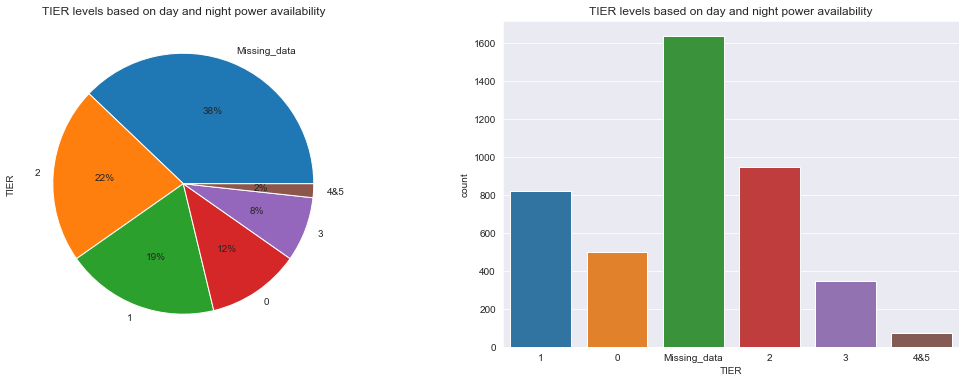

In [1979]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_ave_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on day and night power availability')

#Barplot
sns.countplot('TIER',data=df_ave_new,ax=ax[1])
ax[1].set_title('TIER levels based on day and night power availability')

### Visualizing the TIER without "missing data"

In [1980]:
df2 = df_ave_new[df_ave_new != 'Missing_data'] 


In [1981]:
df2.head()

,Total_availability,TIER
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [1982]:
df2['TIER'].value_counts()

2      944
1      821
0      497
3      346
4&5     74
Name: TIER, dtype: int64

Text(0.5, 1.0, 'TIER levels based on power capacity')

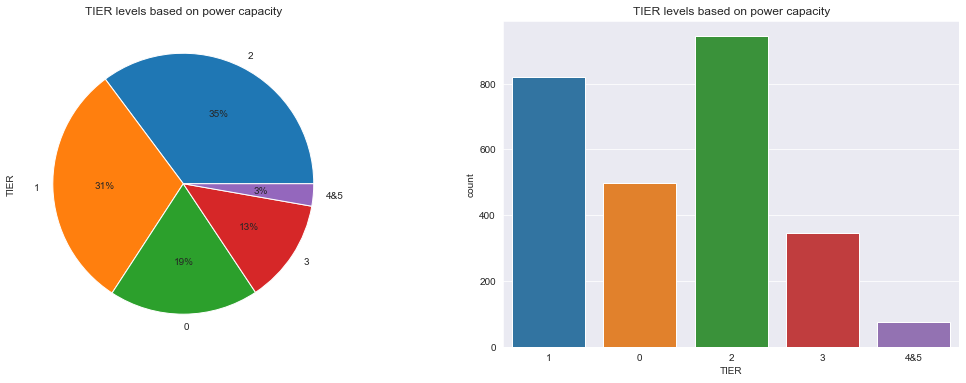

In [1983]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df2,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph we can see that the evening availability in:

1. TIER 0 contributes to 19% of evening availability which is less than 1 hour
2. TIER 1 contributes to 31% of evening availability which is at least 1 hours
3. TIER 2 contributes to 35% of evening availability which is at least 2 hours
4. TIER 3 contributes to 13% of evening availability which is at least 3 hours
5. TIER 4&5 contributes to 3% of evening availability which is at least 4 hours

# Attribute: Reliability

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 
* C28A represents the electricity disruption from the national grid in the worst months. 
* Whereas, C28B represents the electricity disruption from the national grid in the actual months.
* C29A represents the duration of disruption from the national grid in the worst months. 
* Whereas, C29B represents the duration of disruption from the national grid in the actual months.
* C65A represents the electricity disruption from the mini grid in the worst months. 
* Whereas, C65B represents the electricity disruption from the mini grid in the actual months.
* C66A represents the electricity disruption from the mini grid in the worst months. 
* Whereas, C66B represents the electricity disruption from the mini grid in the actual months.


In [1984]:
df_rel= df[['C28_wm','C28_tm','C29_w_h','C29_t_h','C65_wm','q65_tm','C66_w_h','q66_t_h']]

In [1985]:
df_rel.columns = ['National_grid_Worst','National_grid_Typical','National_duration_Worst','National_duration_Typical','Mini_grid_Worst','Mini_grid_Typical','Mini_duration_Worst','Mini_duration_Typical']

In [1986]:
df_rel.head()

,National_grid_Worst,National_grid_Typical,National_duration_Worst,National_duration_Typical,Mini_grid_Worst,Mini_grid_Typical,Mini_duration_Worst,Mini_duration_Typical
0,4.0,2.0,48.0,8.0,NaN,NaN,NaN,NaN
1,4.0,2.0,48.0,8.0,NaN,NaN,NaN,NaN
2,4.0,2.0,48.0,12.0,NaN,NaN,NaN,NaN
3,4.0,2.0,48.0,8.0,NaN,NaN,NaN,NaN
4,4.0,2.0,56.0,12.0,NaN,NaN,NaN,NaN


In [1987]:
df_rel=df_rel.replace(to_replace=888,value=math.nan)

In [1988]:
df_rel.head()

,National_grid_Worst,National_grid_Typical,National_duration_Worst,National_duration_Typical,Mini_grid_Worst,Mini_grid_Typical,Mini_duration_Worst,Mini_duration_Typical
0,4.0,2.0,48.0,8.0,NaN,NaN,NaN,NaN
1,4.0,2.0,48.0,8.0,NaN,NaN,NaN,NaN
2,4.0,2.0,48.0,12.0,NaN,NaN,NaN,NaN
3,4.0,2.0,48.0,8.0,NaN,NaN,NaN,NaN
4,4.0,2.0,56.0,12.0,NaN,NaN,NaN,NaN


In [1989]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   National_grid_Worst        2669 non-null   float64
 1   National_grid_Typical      2668 non-null   float64
 2   National_duration_Worst    2669 non-null   object 
 3   National_duration_Typical  2669 non-null   object 
 4   Mini_grid_Worst            22 non-null     float64
 5   Mini_grid_Typical          22 non-null     float64
 6   Mini_duration_Worst        22 non-null     object 
 7   Mini_duration_Typical      22 non-null     float64
dtypes: float64(5), object(3)
memory usage: 269.9+ KB


### Calculation

In this step Total reliability from all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [1990]:
#National Grid
df_rel['National_grid_Total'] = df_rel.National_grid_Worst.fillna(value=df_rel.National_grid_Typical)

#Duration_national
df_rel['National_duration_Total'] = df_rel.National_duration_Worst.fillna(value=df_rel.National_duration_Typical)

#Mini Grid
df_rel['Mini_grid_Total'] = df_rel.Mini_grid_Worst.fillna(value=df_rel.Mini_grid_Typical)

#Duration_mini
df_rel['Mini_duration_Total'] = df_rel.Mini_duration_Worst.fillna(value=df_rel.Mini_duration_Typical)

#Taking only the total values into consideration
df_rel_new=df_rel[['National_grid_Total','National_duration_Total','Mini_grid_Total','Mini_duration_Total']]

In [1991]:
df_rel_new.head()

,National_grid_Total,National_duration_Total,Mini_grid_Total,Mini_duration_Total
0,4.0,48.0,NaN,NaN
1,4.0,48.0,NaN,NaN
2,4.0,48.0,NaN,NaN
3,4.0,48.0,NaN,NaN
4,4.0,56.0,NaN,NaN


### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1992]:
df_rel_new=df_rel_new.replace(to_replace=math.nan,value='Missing_data')

In [1993]:
df_rel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   National_grid_Total      4317 non-null   object
 1   National_duration_Total  4317 non-null   object
 2   Mini_grid_Total          4317 non-null   object
 3   Mini_duration_Total      4317 non-null   object
dtypes: object(4)
memory usage: 135.0+ KB


In [1994]:
df_rel_new.head(20)

,National_grid_Total,National_duration_Total,Mini_grid_Total,Mini_duration_Total
0,4,48.0,Missing_data,Missing_data
1,4,48.0,Missing_data,Missing_data
2,4,48.0,Missing_data,Missing_data
3,4,48.0,Missing_data,Missing_data
4,4,56.0,Missing_data,Missing_data
5,4,48.0,Missing_data,Missing_data
6,5,60.0,Missing_data,Missing_data
7,4,36.0,Missing_data,Missing_data
8,4,36.0,Missing_data,Missing_data
9,4,48.0,Missing_data,Missing_data


## National grid Reliability

### Adding column "TIER" to the dataset 

In [1995]:
lst=[]
for i in range (df_rel_new.shape[0]):
    value=""
    grid_total = df_rel_new.iat[i,0]
    duration_total = df_rel_new.iat[i,1]
    if isinstance(grid_total, str) and grid_total=="Missing_data":
        value = "Missing_data"
    elif isinstance(duration_total, str) and duration_total=="Missing_data":
        value = "Missing_data"
    elif 0<float(grid_total)<=3 and float(duration_total)<2:
        value = "5"
    elif 3<float(grid_total)<=14 and float(duration_total)>2:
        value = "3&4"
    else:
        value = "0,1&2"
    lst.append(value)
       
# adding list to dataframe
df_rel_new["TIER"] = lst

In [1996]:
df_rel_new.head(20)

,National_grid_Total,National_duration_Total,Mini_grid_Total,Mini_duration_Total,TIER
0,4,48.0,Missing_data,Missing_data,3&4
1,4,48.0,Missing_data,Missing_data,3&4
2,4,48.0,Missing_data,Missing_data,3&4
3,4,48.0,Missing_data,Missing_data,3&4
4,4,56.0,Missing_data,Missing_data,3&4
5,4,48.0,Missing_data,Missing_data,3&4
6,5,60.0,Missing_data,Missing_data,3&4
7,4,36.0,Missing_data,Missing_data,3&4
8,4,36.0,Missing_data,Missing_data,3&4
9,4,48.0,Missing_data,Missing_data,3&4


In [1997]:
df_rel_new['TIER'].value_counts()

Missing_data    1649
3&4             1367
0,1&2           1198
5                103
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on reliability')

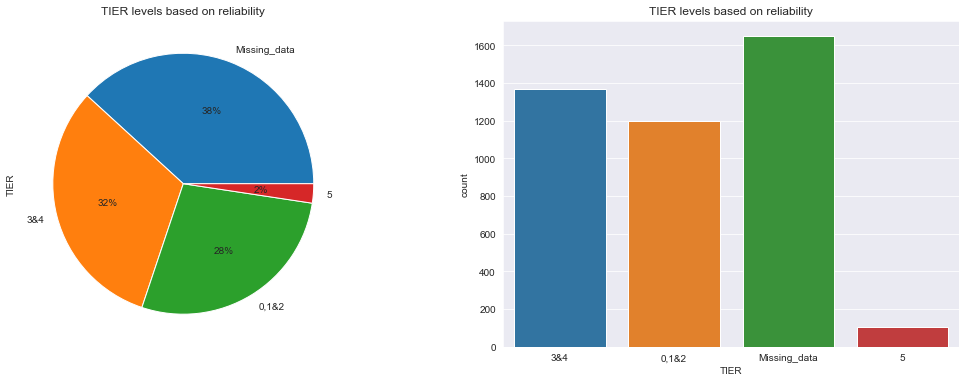

In [1998]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_rel_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('TIER',data=df_rel_new,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

### Visualizing the TIER without "missing data"

In [1999]:
df2 = df_rel_new[df_rel_new != 'Missing_data'] 


In [2000]:
df2.head()

,National_grid_Total,National_duration_Total,Mini_grid_Total,Mini_duration_Total,TIER
0,4,48.0,NaN,NaN,3&4
1,4,48.0,NaN,NaN,3&4
2,4,48.0,NaN,NaN,3&4
3,4,48.0,NaN,NaN,3&4
4,4,56.0,NaN,NaN,3&4


In [2001]:
df2['TIER'].value_counts()

3&4      1367
0,1&2    1198
5         103
Name: TIER, dtype: int64

Text(0.5, 1.0, 'TIER levels based on power capacity')

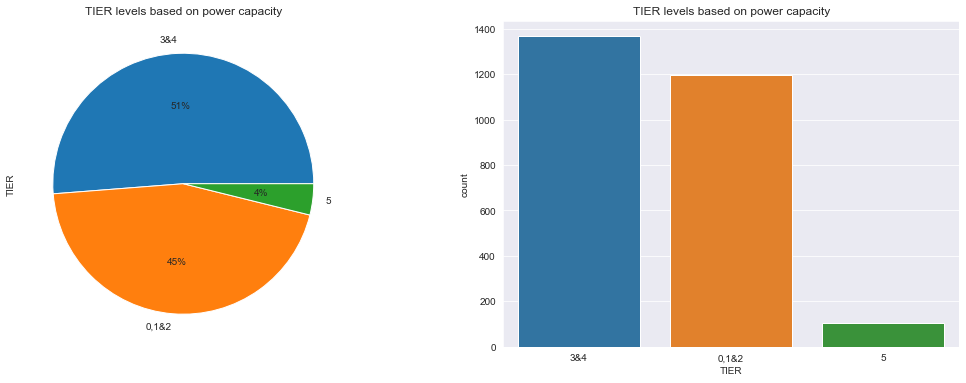

In [2002]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df2,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph we can see:

1. TIER 5 contributes to only 4% of disruptions which is at most 3 disruptions per week with total duration of less than 2 hours
2. TIER 0,1 & 2 contributes to 45% of disruptions which is at most 14 disruptions per week and more than 3 disruptions per week with total duration of more than 2 hours
3. Most of the disruptions/outages in the power supply is in TIER 4 which is 51%

# Attribute: Quality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C35 represents the damaged appliances from the national grid. 
* C72 represents the damaged appliances from the mini grid.
* C100 represents the damaged appliances from the generator set.

In [2003]:
df_q= df[['C35','C72','C100']]

### Renaming the columns

In [2004]:
df_q.columns = ['National_grid', 'Mini_grid','Generator_set']

In [2005]:
df_q.tail()

,National_grid,Mini_grid,Generator_set
4312,NaN,NaN,NaN
4313,NaN,NaN,NaN
4314,NaN,NaN,NaN
4315,NaN,NaN,NaN
4316,NaN,NaN,NaN


In [2006]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_grid  2693 non-null   object
 1   Mini_grid      22 non-null     object
 2   Generator_set  19 non-null     object
dtypes: object(3)
memory usage: 101.3+ KB


### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [2007]:
df_q = df_q.replace(np.nan, 'Missing_data', regex=True)

In [2008]:
df_q.tail()

,National_grid,Mini_grid,Generator_set
4312,Missing_data,Missing_data,Missing_data
4313,Missing_data,Missing_data,Missing_data
4314,Missing_data,Missing_data,Missing_data
4315,Missing_data,Missing_data,Missing_data
4316,Missing_data,Missing_data,Missing_data


### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on quality')

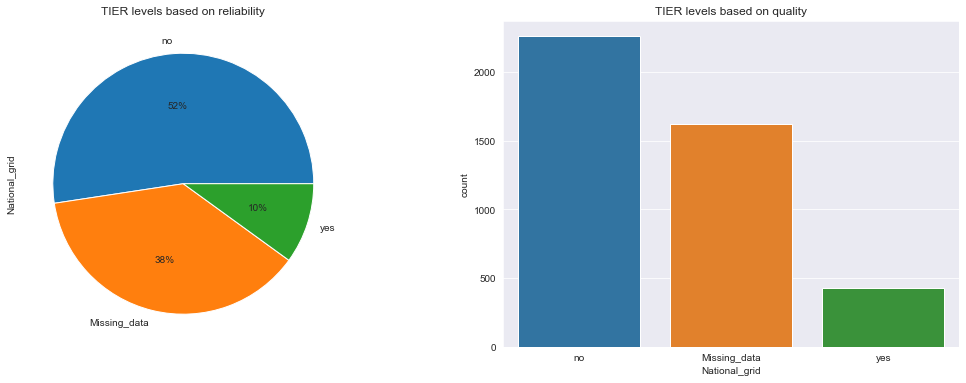

In [2009]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_q['National_grid'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('National_grid',data=df_q,ax=ax[1])
ax[1].set_title('TIER levels based on quality')

### Visualizing the TIER without "missing data"

In [2010]:
df2 = df_q[df_q != 'Missing_data'] 


In [2011]:
df2.head()

,National_grid,Mini_grid,Generator_set
0,no,NaN,NaN
1,no,NaN,NaN
2,no,NaN,NaN
3,no,NaN,NaN
4,no,NaN,NaN


Text(0.5, 1.0, 'TIER levels based on quality')

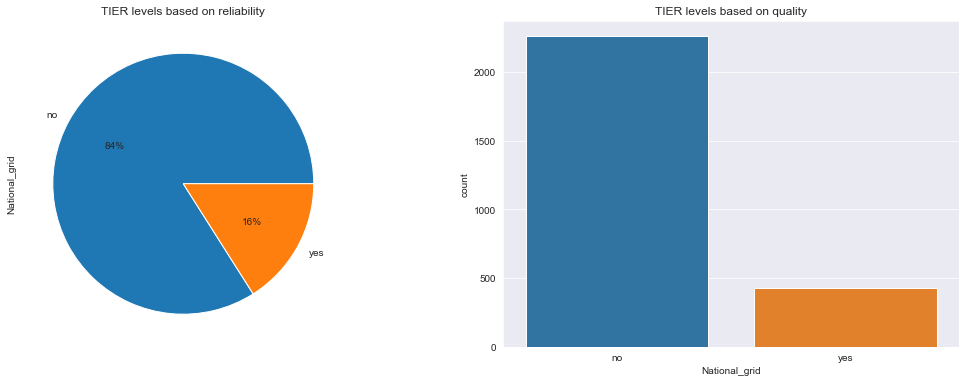

In [2012]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['National_grid'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('National_grid',data=df2,ax=ax[1])
ax[1].set_title('TIER levels based on quality')

In the above graph it can be seen that:

1. The products damaged by national grid are 16% which comes in the TIER 0-3
2. The products which are not damaged by national grid are 84% and it comes in the TIER 4-5.


# Attribute: Affordability 

In this step, a dataframe has been uploaded to calculate the yearly income of the household.

In [2013]:
df = pd.io.stata.read_stata('Section A_HHRoster.dta', convert_categoricals=False)

In [2014]:
df.to_csv("Household_data.csv")

### Importing the dataset

In [2015]:
df = pd.read_csv('Household_data.csv')

In [2016]:
df.head()

,Unnamed: 0,HHID,IndividualID,quest_id,HI_1,HI_2,HI_3,HI_4,HI_5,HI_6,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,EAID
0,0,1010200116005,101020011600501,1,1,1,2,1,16,1,...,6.0,1.0,3.0,20.0,12.0,24.0,1700.0,2.0,NaN,1.010220e+12
1,1,1010200116005,101020011600502,1,1,1,2,1,16,1,...,1.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1.010220e+12
2,2,1010200116005,101020011600503,1,1,1,2,1,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.010220e+12
3,3,1010200116014,101020011601401,2,1,1,2,1,16,1,...,6.0,1.0,4.0,2.0,5.0,24.0,1000.0,2.0,NaN,1.010220e+12
4,4,1010200116014,101020011601402,2,1,1,2,1,16,1,...,1.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1.010220e+12


In [2017]:
df_income=df[['A18']]

In [2018]:
df_income.head()

,A18
0,1700.0
1,NaN
2,NaN
3,1000.0
4,NaN


Since the salary is in months and we need annual salary, multiplying the column by 12.

In [2019]:
df_income['A18'] = df_income['A18'].apply(lambda x: x*12)


In [2020]:
df_income.head()

,A18
0,20400.0
1,NaN
2,NaN
3,12000.0
4,NaN


In [2021]:
df_income=df_income.replace(to_replace=math.nan,value='Missing_data')

In [2023]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19442 entries, 0 to 19441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A18     19442 non-null  object
dtypes: object(1)
memory usage: 152.0+ KB


### Adding column "TIER" to the dataset

In [2031]:
# AVAILABILITY: Day
#Note: conditions for TIER to satisfy is if the cost of 365kWh (0.03$ per kWh) is less/more than 5% of household income
# so, 365*0.03*8.3 (conversion rate of 2006) = 90.885 Birr 

def conditions(A18):
    if A18 == 'Missing_data':
        return "Missing_data"
    elif float(0.05*(A18))>90.885:
        return "3,4&5"
    else:
        return "0,1&2"
    
func = np.vectorize(conditions)
transform = func(df_income.A18)
df_income["TIER"] = transform

In [2032]:
df_income.head()

,A18,TIER
0,20400,"3,4&5"
1,Missing_data,Missing_data
2,Missing_data,Missing_data
3,12000,"3,4&5"
4,Missing_data,Missing_data


In [2033]:
df_income['TIER'].value_counts()

Missing_data    13562
3,4&5            5469
0,1&2             411
Name: TIER, dtype: int64

Text(0.5, 1, 'TIER levels based on affordability')

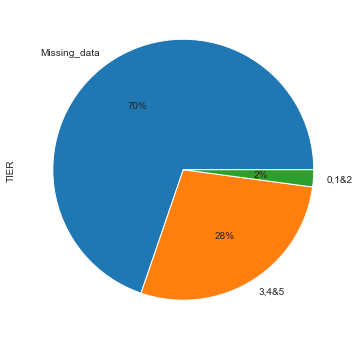

In [2034]:
df_income['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on affordability')

### Visualizing the TIER without "missing data"

In [2035]:
df2 = df_income[df_income != 'Missing_data'] 


In [2036]:
df2.head()

,A18,TIER
0,20400,"3,4&5"
1,NaN,NaN
2,NaN,NaN
3,12000,"3,4&5"
4,NaN,NaN


Text(0.5, 1, 'TIER levels based on formality')

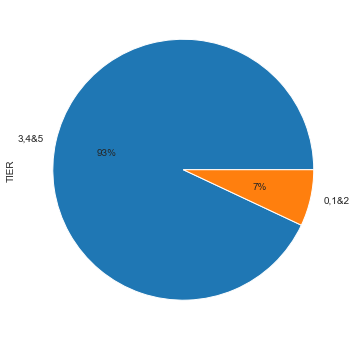

In [2037]:
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on formality')

In the above graph we can see:

1. Only 7% lies in TIER 0,1 and 2 for whom the cost of a standard consumption package of 365 kWh per year is more than 5% of household income
2. 93% lies in TIER 3, 4 and 5 for whom the cost of a standard consumption package of 365 kWh per year is less than 5% of household income

# Attribute: Formality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C17 represents the electricity bill payment for using the national grid. 
* C57 represents the electricity bill payment for using the mini grid.

In [1878]:
df_f= df[['C17','C52']]

### Renaming the columns

In [1879]:
df_f.columns = ['National_grid', 'Mini_grid']

In [1880]:
df_f.head()

,National_grid,Mini_grid
0,NaN,NaN
1,fixed monthly fee,NaN
2,fixed monthly fee,NaN
3,fixed monthly fee,NaN
4,fixed monthly fee,NaN


### Replacing NaN values with "Missing_data"

In [1881]:
df_f = df_f.replace(np.nan, 'Missing_data')

In [1882]:
df_f['National_grid'].value_counts()

Missing_data                               3547
fixed monthly fee                           522
utility estimates consumption               115
pay based on lights and appliances used      80
no bill for electricity                      38
house rent included                          13
other                                         2
Name: National_grid, dtype: int64

In [1883]:
df_f['Mini_grid'].value_counts()

Missing_data               4310
fixed monthly fee             5
no bill for electricity       2
Name: Mini_grid, dtype: int64

### Focusing on National grid

In [1884]:
def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid=='no bill for electricity':
        return "No bill paid for electricity"
    else:
        return "Bill paid for electricity"
    
func = np.vectorize(conditions)
transform = func(df_f.National_grid)
df_f["TIER"] = transform

In [1885]:
df_f.head()

,National_grid,Mini_grid,TIER
0,Missing_data,Missing_data,Missing_data
1,fixed monthly fee,Missing_data,Bill paid for electricity
2,fixed monthly fee,Missing_data,Bill paid for electricity
3,fixed monthly fee,Missing_data,Bill paid for electricity
4,fixed monthly fee,Missing_data,Bill paid for electricity


### Visualizing the TIER levels 

Text(0.5, 1, 'TIER levels based on formality')

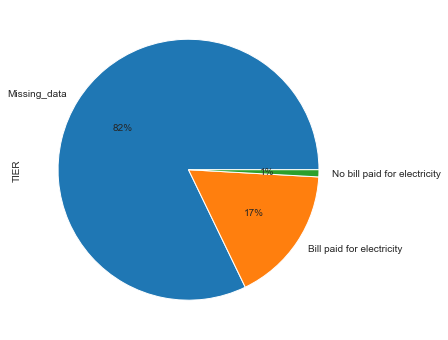

In [1886]:
df_f['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on formality')

### Visualizing the TIER without "missing data"

In [1887]:
df2 = df_f[df_f != 'Missing_data'] 


In [1888]:
df2.head()

,National_grid,Mini_grid,TIER
0,NaN,NaN,NaN
1,fixed monthly fee,NaN,Bill paid for electricity
2,fixed monthly fee,NaN,Bill paid for electricity
3,fixed monthly fee,NaN,Bill paid for electricity
4,fixed monthly fee,NaN,Bill paid for electricity


Text(0.5, 1, 'TIER levels based on formality')

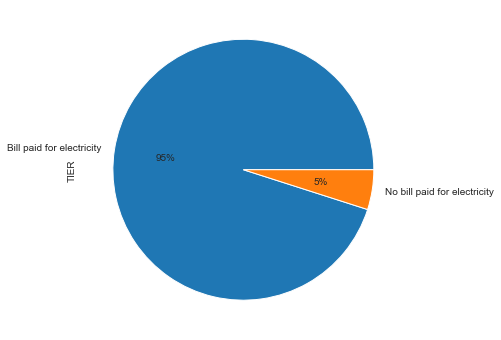

In [1889]:
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on formality')

In the above graph we can see:

1. Only 5% lies in TIER 0-3 for not paying the electricity bill
2. 95% lies in TIER 4-5 for paying the electricity bill

# Attribute: Health and Safety

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C37 represents the accidents caused using the national grid. 
* C74 represents the accidents caused using the mini grid.
* C102 represents the accidents caused using the generator set.
* C120 represents the accidents caused using the battery.


In [1890]:
df_hs= df[['C37','C74','C102','C120']]

In [1891]:
df_hs.columns = ['National_grid', 'Mini_grid','Generator_set','Battery']

In [1892]:
df_hs.head()

,National_grid,Mini_grid,Generator_set,Battery
0,no,NaN,NaN,NaN
1,no,NaN,NaN,NaN
2,no,NaN,NaN,NaN
3,no,NaN,NaN,NaN
4,no,NaN,NaN,NaN


In [1893]:
df_hs['National_grid'].value_counts()

no     2682
yes      11
Name: National_grid, dtype: int64

### Focusing on National grid

In [1894]:
df_hs = df_hs.replace(np.nan, 'Missing_data', regex=True)

In [1895]:
def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid=='yes' :
        return "Serious accidents"
    else:
        return "No accidents"
    
func = np.vectorize(conditions)
transform = func(df_hs.National_grid)
df_hs["TIER"] = transform

In [1896]:
df_hs.head()

,National_grid,Mini_grid,Generator_set,Battery,TIER
0,no,Missing_data,Missing_data,Missing_data,No accidents
1,no,Missing_data,Missing_data,Missing_data,No accidents
2,no,Missing_data,Missing_data,Missing_data,No accidents
3,no,Missing_data,Missing_data,Missing_data,No accidents
4,no,Missing_data,Missing_data,Missing_data,No accidents


### Visualizing the TIER levels 

Text(0.5, 1, 'TIER levels based on reliability')

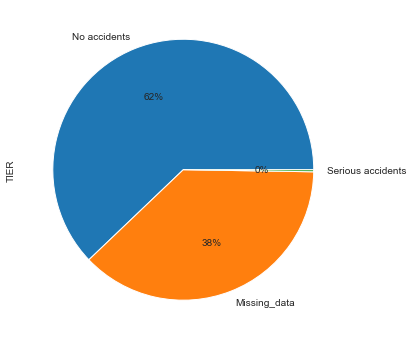

In [1897]:
df_hs['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on reliability')

In the above graph it can be seen that there are hardly any accidents caused by using electricity from the national grid.

### Visualizing the TIER without "missing data"

In [1898]:
df2 = df_hs[df_hs != 'Missing_data'] 

In [1899]:
df2.head()

,National_grid,Mini_grid,Generator_set,Battery,TIER
0,no,NaN,NaN,NaN,No accidents
1,no,NaN,NaN,NaN,No accidents
2,no,NaN,NaN,NaN,No accidents
3,no,NaN,NaN,NaN,No accidents
4,no,NaN,NaN,NaN,No accidents


Text(0.5, 1, 'TIER levels based on reliability')

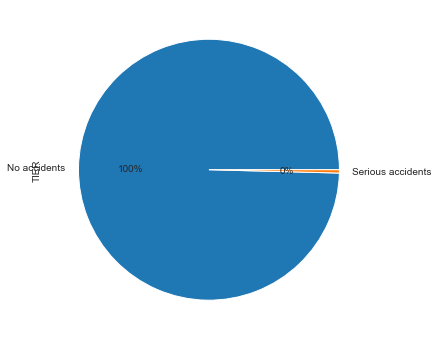

In [1900]:
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on reliability')

The above graph depicts the number of accidents prone to electricity usage which is almost 0.